# K-Means

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
samples=np.array([[1,2],[12,2],[0,1],[10,0],[9,1],[8,2],[0,10],[1,8],[2,9],[9,9],[10,8],[8,9] ], dtype=np.float)
centers=np.array([[3,2], [2,6], [9,3], [7,6]], dtype=np.float)
N=len(samples)

[]

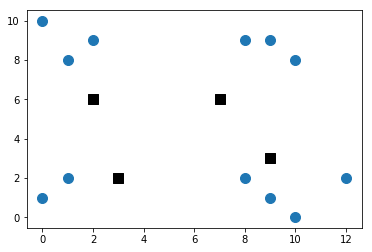

In [3]:
fig, ax = plt.subplots()
ax.scatter(samples.transpose()[0], samples.transpose()[1], marker='o', s=100)
ax.scatter(centers.transpose()[0], centers.transpose()[1], marker='s', s=100, color='black')
plt.plot()

In [4]:
def distance(sample, centroids):
    distances = np.zeros(len(centroids))
    for i in range(0, len(centroids)):
        dist = np.sqrt(sum(pow(np.subtract(sample, centroids[i]), 2)))
        distances[i] = dist
    return distances

In [5]:
def showcurrentstatus(samples, centers, clusters, plotnumber):
    plt.subplot(620+plotnumber)
    plt.scatter(samples.transpose()[0], samples.transpose()[1], marker='o', s=150, c=clusters)
    plt.scatter(centers.transpose()[0], centers.transpose()[1], marker='s', s=100, color='black')
    plt.plot()

In [6]:
def kmeans(centroids, samples, K, plotresults):
    plt.figure(figsize=(20,20))
    distances = np.zeros((N, K))
    new_centroids = np.zeros((K, 2))
    final_centroids = np.zeros((K, 2))
    clusters = np.zeros(len(samples), np.int)
    
    for i in range(0, len(samples)):
        distances[i] = distance(samples[i], centroids)
        clusters[i] = np.argmin(distances[i])
        new_centroids[clusters[i]] += samples[i]
        divisor = np.bincount(clusters).astype(np.float)
        divisor.resize([K])
        
        for j in range(0, K):
            final_centroids[j] = np.nan_to_num(np.divide(new_centroids[j], divisor[j]))
        
        if(i>3 and plotresults==True):
            showcurrentstatus(samples[:i], final_centroids, clusters[:i], i-3)
            
    return final_centroids

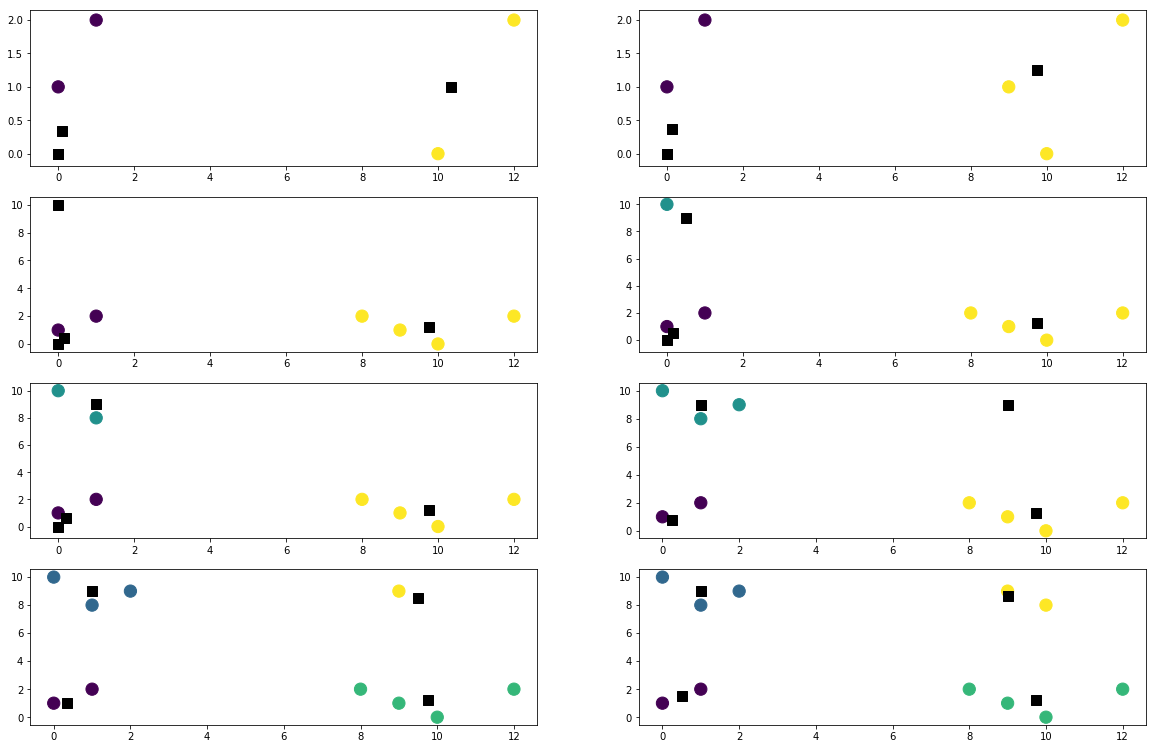

In [7]:
np.seterr(divide='ignore', invalid='ignore')
finalcenter = kmeans(centers, samples, 4, True)